# Lab 1: Customer Churn Prediction using Neural Network



# Objective
Understanding the data preparation process for neural network training, implement a basic neural network using PyTorch, visualize and interpret the training process, apply neural networks to solve real-world business problems, and understand the impact of different activation functions.

### Neural Network Fundamentals
Neural networks are computational models inspired by biological neural networks. They consist of:
- **Neurons**: Basic computational units that receive inputs, apply weights, and produce outputs
- **Layers**: Collections of neurons that process information hierarchically
- **Weights and Biases**: Adjustable parameters that the network learns during training
- **Activation Functions**: Non-linear functions that introduce complexity and enable learning

### Activation Functions
- **ReLU (Rectified Linear Unit)**: f(x) = max(0,x)
  - Most commonly used activation function
  - Helps solve the vanishing gradient problem
  - Simple and computationally efficient
  
- **Sigmoid**: f(x) = 1/(1 + e^(-x))
  - Outputs between 0 and 1
  - Useful for binary classification
  - Can suffer from vanishing gradients

### Forward Propagation
The process where input data flows through the network:
1. Input layer receives the data
2. Each neuron computes: output = activation(weights * inputs + bias)
3. Output flows to the next layer
4. Process repeats until final output layer

### Loss Functions
Measure the difference between predicted and actual values:
- **Binary Cross-Entropy**: For binary classification tasks
- **Mean Squared Error**: For regression tasks
- **Categorical Cross-Entropy**: For multi-class classification

### Backpropagation
The process of computing gradients and updating weights:
1. Calculate error at output layer
2. Compute gradients using chain rule
3. Update weights and biases
4. Propagate errors backwards through network

# Tasks
## 1: Exploratory Data Analysis and Data Understanding
## 2: Data Preprocessing and Class Imbalance Handling
## 3: Building the Neural Network
## 4: Training the Model
## 5: Model Evaluation



# Basic ANN Structure

 1: Intuition for understanding ANN
"""
Artificial Neural Network Pseudo-code:

1. Initialize Neural Network:
   - Define number of input nodes (features)
   - Define number of hidden nodes
   - Define number of output nodes
   - Initialize weights randomly
   - Initialize biases

2. Forward Propagation:
   For each layer:
       output = activation_function(input * weights + bias)
       pass output to next layer

3. Calculate Loss:
   loss = loss_function(predicted_output, actual_output)

4. Backward Propagation:
   For each layer from last to first:
       Calculate gradients
       Update weights and biases

5. Training Loop:
   For each epoch:
       For each batch of data:
           Perform Forward Propagation
           Calculate Loss
           Perform Backward Propagation
           Update Parameters

In [1]:
#  Simple ANN Implementation
import torch
import torch.nn as nn

# Define a simple neural network
class SimpleANN(nn.Module):
    def __init__(self, input_size):
        super(SimpleANN, self).__init__()

        # Simple architecture with one hidden layer
        self.layer1 = nn.Linear(input_size, 4)  # input -> hidden
        self.relu = nn.ReLU()                   # activation function
        self.layer2 = nn.Linear(4, 1)          # hidden -> output
        self.sigmoid = nn.Sigmoid()             # final activation

    def forward(self, x):
        # Forward pass through the network
        x = self.layer1(x)     # First layer
        x = self.relu(x)       # Activation
        x = self.layer2(x)     # Second layer
        x = self.sigmoid(x)    # Final activation
        return x

In [2]:
# Create dummy data
input_size = 3
X = torch.randn(5, input_size)  # 5 samples, 3 features each
y = torch.randint(0, 2, (5, 1)).float()  # Random binary labels

# Create model
model = SimpleANN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Simple training loop (5 epochs)
print("Training Example:")
for epoch in range(5):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Training Example:
Epoch 1, Loss: 0.6979
Epoch 2, Loss: 0.6973
Epoch 3, Loss: 0.6967
Epoch 4, Loss: 0.6962
Epoch 5, Loss: 0.6956


In [3]:

print("\nMaking predictions with trained model:")
# Test with one sample
test_input = torch.randn(1, input_size)
prediction = model(test_input)
print(f'Input: {test_input}')
print(f'Predicted probability: {prediction.item():.4f}')


Making predictions with trained model:
Input: tensor([[-1.9029,  0.4632, -0.4500]])
Predicted probability: 0.5755


## Task 1: Exploratory Data Analysis and Data Understanding

### 1.1 Initial Data Exploration


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Data Set
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [ ]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (7043, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

In [ ]:
# Display first few rows
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("\nChurn Distribution:")
churn_dist = df['Churn'].value_counts(normalize=True)
print(churn_dist)



Churn Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


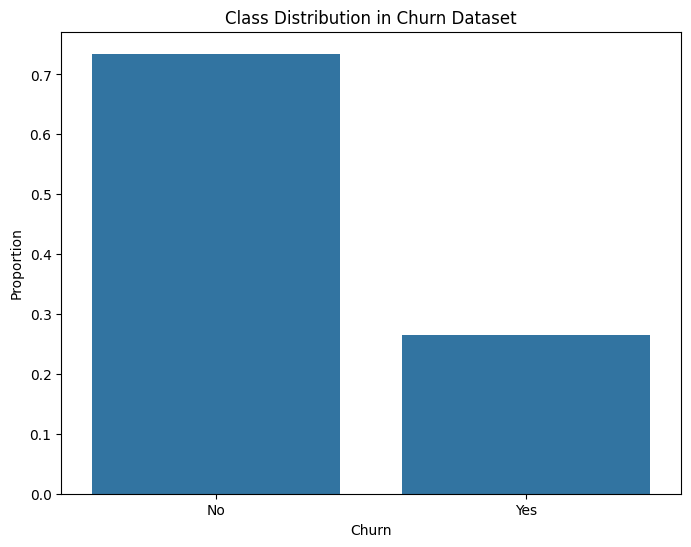

In [ ]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_dist.index, y=churn_dist.values)
plt.title('Class Distribution in Churn Dataset')
plt.ylabel('Proportion')
plt.show()

### 1.2 Feature Analysis


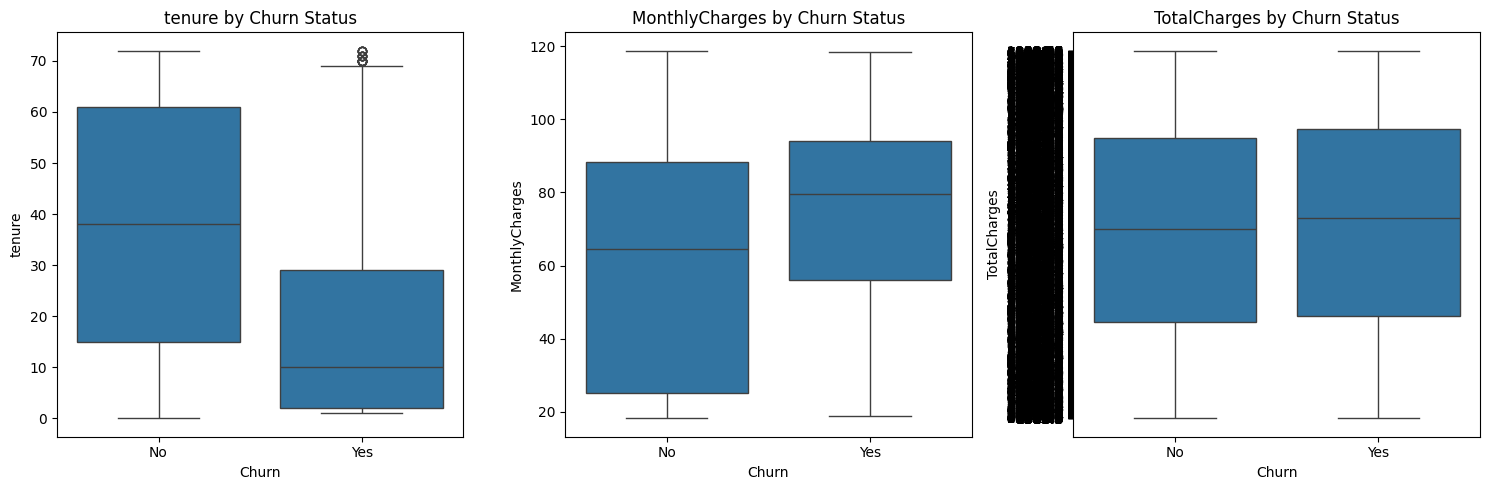

In [ ]:
# Analyze numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')
plt.tight_layout()
plt.show()

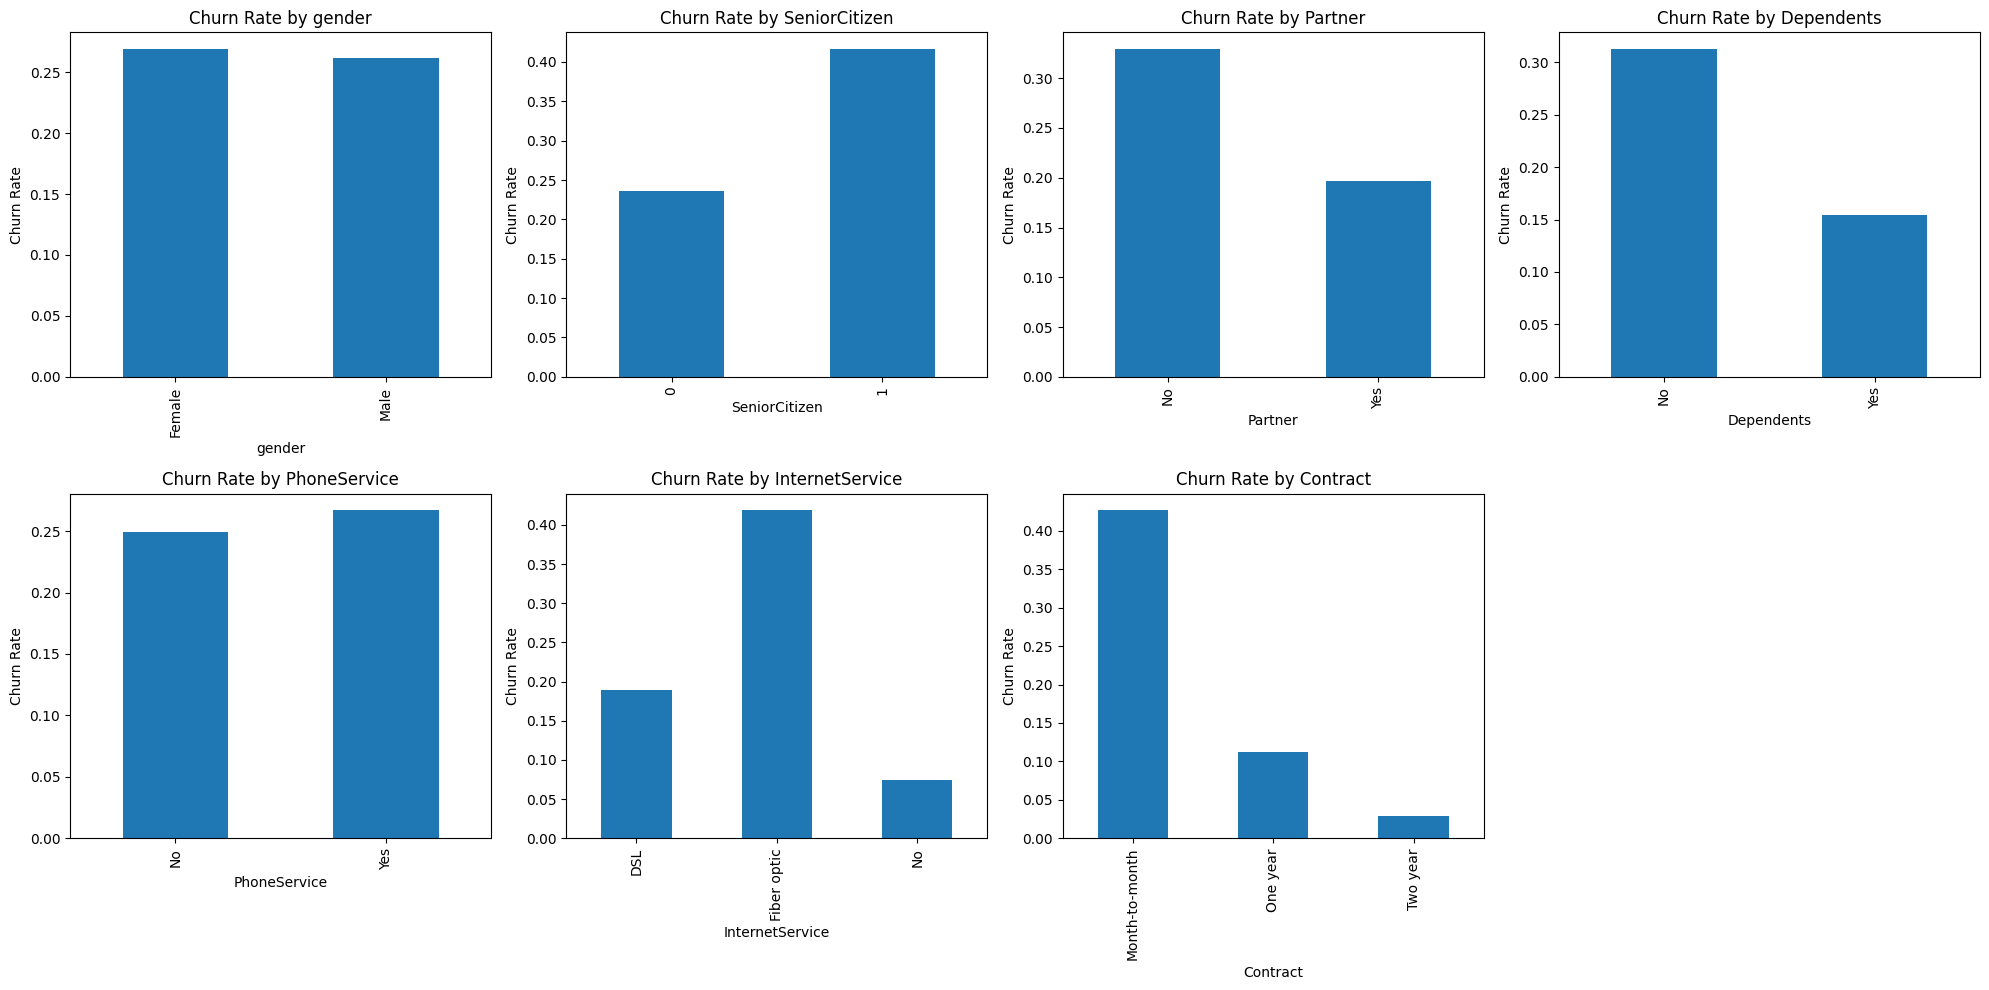

In [ ]:
# Analyze categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'InternetService', 'Contract']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    df_pct = df.groupby(feature)['Churn'].value_counts(normalize=True).unstack()
    df_pct['Yes'].plot(kind='bar')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

### 1.3 Correlation Analysis


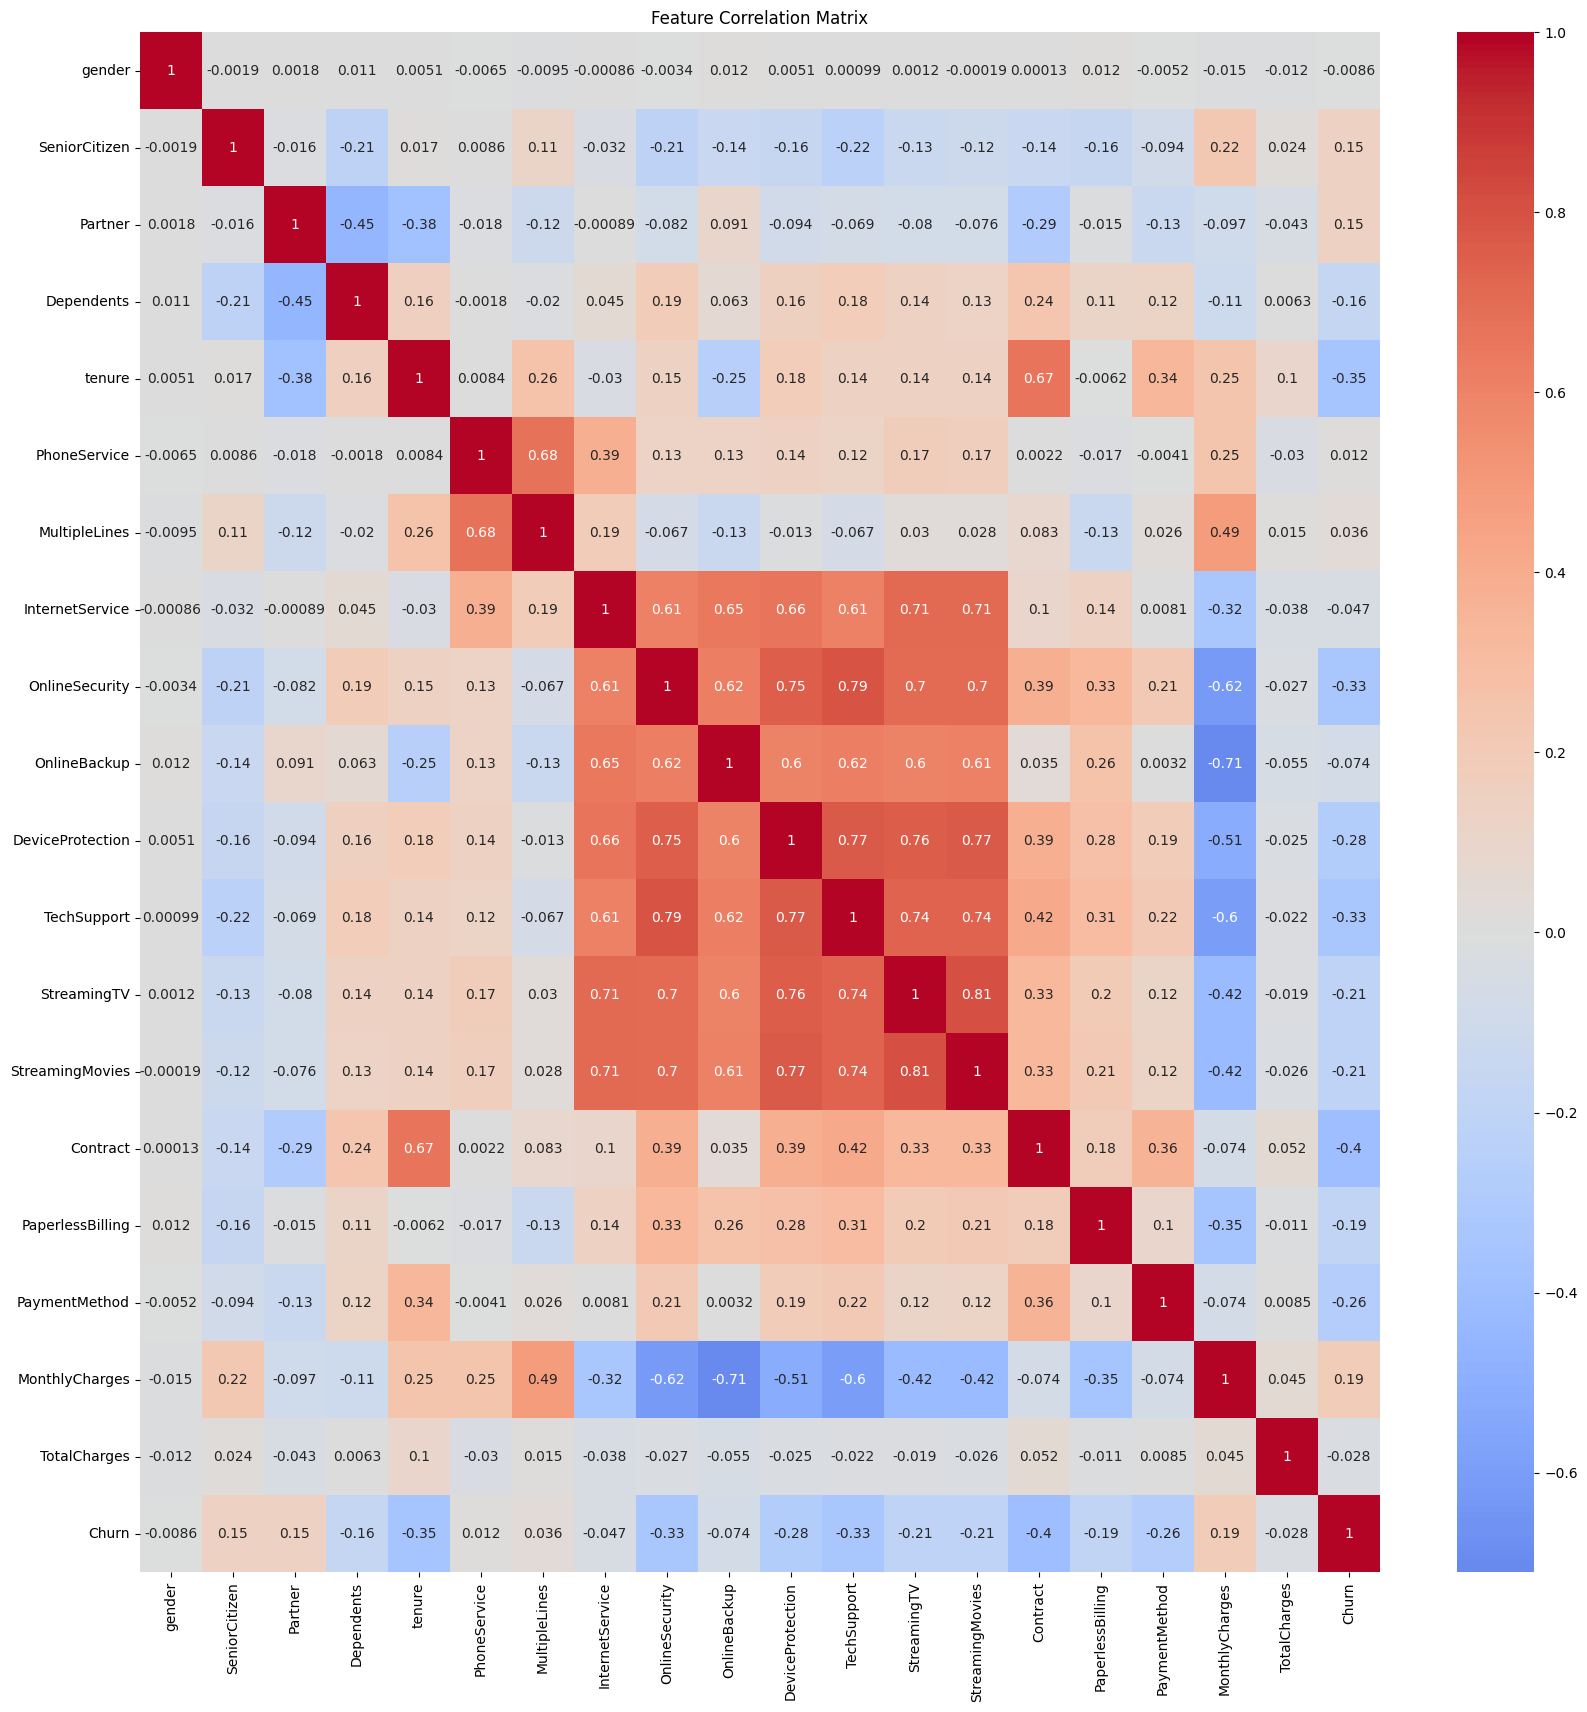

In [ ]:

# Convert categorical variables to numeric for correlation analysis
df_numeric = df.copy()
for column in df_numeric.select_dtypes(['object']).columns:
    if column != 'customerID':
        df_numeric[column] = pd.factorize(df_numeric[column])[0]

# Calculate correlations
correlation_matrix = df_numeric.drop('customerID', axis=1).corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

### 1.4 Key Insights from EDA


#### 1.4.1 Numerical Features Analysis
1. **Tenure:**
   - Churned customers have significantly lower tenure (median ~10 months)
   - Non-churned customers have higher tenure (median ~35 months)
   - This suggests that longer-term customers are less likely to churn

2. **Monthly Charges:**
   - Churned customers tend to have higher monthly charges
   - More variation in charges for churned customers
   - Suggests price sensitivity might be a churn factor

3. **Total Charges:**
   - Follows similar pattern to tenure
   - Non-churned customers have higher total charges
   - Indicates value accumulation over time



#### 1.4.1 Numerical Features Analysis
1. **Tenure:**
   - Churned customers have significantly lower tenure (median ~10 months)
   - Non-churned customers have higher tenure (median ~35 months)
   - This suggests that longer-term customers are less likely to churn

2. **Monthly Charges:**
   - Churned customers tend to have higher monthly charges
   - More variation in charges for churned customers
   - Suggests price sensitivity might be a churn factor

3. **Total Charges:**
   - Follows similar pattern to tenure
   - Non-churned customers have higher total charges
   - Indicates value accumulation over time

#### 1.4.2 Categorical Features Analysis
1. **Demographics:**
   - Gender: Minimal impact on churn (similar rates ~26%)
   - SeniorCitizen: Higher churn rate (40%) compared to non-seniors (24%)
   - Partner: Single customers more likely to churn (32% vs 20%)
   - Dependents: Customers without dependents show higher churn (30% vs 15%)

2. **Services:**
   - PhoneService: Slightly higher churn for customers with phone service
   - InternetService:
     * Fiber optic users have highest churn rate (~40%)
     * DSL users have moderate churn (~20%)
     * No internet service has lowest churn (~7%)
   - Contract Type: Strong indicator
     * Month-to-month: Highest churn (~40%)
     * One year: Moderate churn (~10%)
     * Two year: Lowest churn (~3%)

#### 1.4.3 Correlation Analysis
1. **Strong Positive Correlations:**
   - Internet-related services show strong correlations (0.6-0.8)
   - StreamingTV and StreamingMovies (0.81)
   - TechSupport and DeviceProtection (0.77)
   - OnlineSecurity and DeviceProtection (0.75)

2. **Strong Negative Correlations:**
   - OnlineBackup and MonthlyCharges (-0.71)
   - Contract length and Churn (-0.40)
   - Tenure and Churn (-0.35)

3. **Key Churn Correlations:**
   - Strongest negative correlation with Contract type (-0.40)
   - Moderate negative correlation with Tenure (-0.35)
   - Positive correlation with MonthlyCharges (0.19)
   - Weak correlation with demographic features

#### 1.4.4 Business Implications
1. **High-Risk Customer Profiles:**
   - New customers (low tenure)
   - Month-to-month contracts
   - Higher monthly charges
   - Fiber optic service users
   - Senior citizens
   - Single customers without dependents
   - No additional services

2. **Retention Opportunities:**
   - Encourage longer-term contracts
   - Bundle services for better value
   - Special attention to first few months of service
   - Focus on senior citizen retention programs
   - Target additional services to fiber optic users
1. Class Imbalance:
   - No (Non-churned): 73.46%
   - Yes (Churned): 26.54%
   - Need to handle this imbalance during model training

2. Feature Characteristics:
   - 3 numerical features (tenure, MonthlyCharges, TotalCharges)
   - 17 categorical features
   - No missing values in the dataset

3. Important Correlations:
   - Analyze which features have strong correlations with churn
   - Identify potential multicollinearity between features

## Understanding Data Preprocessing
Before we build our neural network, we need to prepare our data. This involves:
1. Handling categorical variables through encoding
2. Scaling numerical features
3. Converting data into PyTorch tensors

## Task 2: Data Preprocessing and Class Imbalance Handling


### 2.1 Data Preprocessing


In [ ]:
# Analyze special cases in services
service_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

print("Unique values in service columns:")
for col in service_columns:
    print(f"\n{col}:", df[col].unique())
    print("Value counts:")
    print(df[col].value_counts())


Unique values in service columns:

MultipleLines: ['No phone service' 'No' 'Yes']
Value counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: ['DSL' 'Fiber optic' 'No']
Value counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: ['No' 'Yes' 'No internet service']
Value counts:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup: ['Yes' 'No' 'No internet service']
Value counts:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection: ['No' 'Yes' 'No internet service']
Value counts:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport: ['No' 'Yes' 'No internet service']
Value 

In [ ]:
# Function to handle special cases in service columns
def preprocess_service_columns(df):
    df_processed = df.copy()

    # Handle MultipleLines special case
    df_processed['MultipleLines'] = df_processed['MultipleLines'].replace({
        'No phone service': 'No',  # Treat 'No phone service' same as 'No'
    })

    # Handle Internet-dependent services
    internet_dependent_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies']

    for column in internet_dependent_services:
        df_processed[column] = df_processed[column].replace({
            'No internet service': 'No'  # Treat 'No internet service' same as 'No'
        })

    # Create binary flags for service availability
    df_processed['HasPhoneService'] = (df_processed['PhoneService'] == 'Yes').astype(int)
    df_processed['HasInternetService'] = (df_processed['InternetService'] != 'No').astype(int)

    return df_processed


In [ ]:
# Apply preprocessing
df_processed = preprocess_service_columns(df)


In [ ]:

# Verify the changes
print("\nAfter preprocessing - Unique values:")
for col in service_columns:
    print(f"\n{col}:", df_processed[col].unique())


After preprocessing - Unique values:

MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['No' 'Yes']

StreamingTV: ['No' 'Yes']

StreamingMovies: ['No' 'Yes']


In [ ]:
# Create aggregate service features
df_processed['TotalServices'] = (
    (df_processed[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes')
    .sum(axis=1)
)

df_processed['InternetType'] = df_processed['InternetService'].map({
    'DSL': 1,
    'Fiber optic': 2,
    'No': 0
})

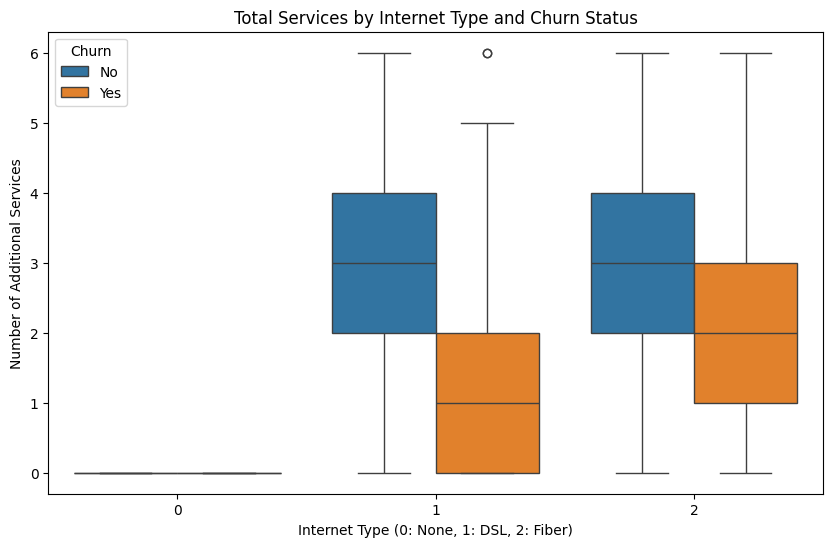

In [ ]:
# Visualize service adoption patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetType', y='TotalServices', hue='Churn', data=df_processed)
plt.title('Total Services by Internet Type and Churn Status')
plt.xlabel('Internet Type (0: None, 1: DSL, 2: Fiber)')
plt.ylabel('Number of Additional Services')
plt.show()

In [ ]:
# Separate columns by encoding type
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies']

multi_value_columns = ['InternetService', 'Contract', 'PaymentMethod']

# Encode binary columns
for column in binary_columns:
    df_processed[column + '_encoded'] = (df_processed[column] == 'Yes').astype(int)

# Encode multi-value columns using one-hot encoding
df_encoded = pd.get_dummies(df_processed, columns=multi_value_columns, prefix=multi_value_columns)


In [ ]:
# Prepare final feature set
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']
encoded_features = [col for col in df_encoded.columns if col.endswith('_encoded') or
                   any(prefix in col for prefix in multi_value_columns)]

X = df_encoded[numerical_features + encoded_features].values
y = (df_encoded['Churn'] == 'Yes').astype(int).values

# Print feature names for reference
print("\nFinal features:")
for i, feature in enumerate(numerical_features + encoded_features):
    print(f"{i}: {feature}")


Final features:
0: tenure
1: MonthlyCharges
2: TotalCharges
3: TotalServices
4: HasInternetService
5: gender_encoded
6: Partner_encoded
7: Dependents_encoded
8: PhoneService_encoded
9: PaperlessBilling_encoded
10: OnlineSecurity_encoded
11: OnlineBackup_encoded
12: DeviceProtection_encoded
13: TechSupport_encoded
14: StreamingTV_encoded
15: StreamingMovies_encoded
16: InternetService_DSL
17: InternetService_Fiber optic
18: InternetService_No
19: Contract_Month-to-month
20: Contract_One year
21: Contract_Two year
22: PaymentMethod_Bank transfer (automatic)
23: PaymentMethod_Credit card (automatic)
24: PaymentMethod_Electronic check
25: PaymentMethod_Mailed check


In [ ]:
# Handle categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling', 'PaymentMethod']

# Create label encoders for each categorical column
encoders = {}
for column in categorical_columns:
    encoders[column] = LabelEncoder()
    df[column + '_encoded'] = encoders[column].fit_transform(df[column])

# Convert TotalCharges to numeric, handling any special characters
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Prepare features and target
X = df[['tenure', 'MonthlyCharges', 'TotalCharges'] +
       [col + '_encoded' for col in categorical_columns]].values
y = LabelEncoder().fit_transform(df['Churn'])

<ipython-input-28-7654c8ed9891>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


### 2.2 Class Imbalance Handling


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# Define resampling strategy
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# Create resampling pipeline
resampling = Pipeline([('over', over), ('under', under)])

# Apply resampling
X_resampled, y_resampled = resampling.fit_resample(X, y)

# Check new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
print("\nResampled class distribution:")
for label, count in zip(unique, counts):
    print(f"Class {label}: {count} samples ({count/len(y_resampled):.2%})")


Resampled class distribution:
Class 0: 3233 samples (55.55%)
Class 1: 2587 samples (44.45%)


### 2.3 Data Scaling and Splitting


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_resampled)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

### 2.4 Custom Dataset and DataLoader Creation


In [ ]:
from torch.utils.data import Dataset, DataLoader

class ChurnDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create training and test datasets
train_dataset = ChurnDataset(X_train, y_train)
test_dataset = ChurnDataset(X_test, y_test)


In [ ]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Handle categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling', 'PaymentMethod']

# Create label encoders for each categorical column
encoders = {}
for column in categorical_columns:
    encoders[column] = LabelEncoder()
    df[column + '_encoded'] = encoders[column].fit_transform(df[column])


In [ ]:
# Convert TotalCharges to numeric, handling any special characters
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Prepare features and target
X = df[['tenure', 'MonthlyCharges', 'TotalCharges'] +
       [col + '_encoded' for col in categorical_columns]].values
y = LabelEncoder().fit_transform(df['Churn'])

<ipython-input-35-7f15888b8cf4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

## Understanding Neural Network Architecture
A neural network consists of layers of neurons connected by weights. In this lab, we'll create a simple feedforward neural network with:
- Input layer: Matches our feature dimension
- Hidden layer: Using ReLU activation
- Output layer: Using Sigmoid activation for binary classification

## Task 3: Building the Neural Network



In [ ]:
class BaseChurnPredictor(nn.Module):
    def __init__(self, input_size):
        super(BaseChurnPredictor, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

In [ ]:
# Initialize the model
input_size = X_train.shape[1]
model = BaseChurnPredictor(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Understanding Training Process
During training, we:
1. Forward pass: Make predictions
2. Calculate loss: Compare predictions with actual values
3. Backward pass: Calculate gradients
4. Update weights: Adjust model parameters

## Task 4: Training the Model


In [ ]:
# Training loop
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Record training loss
    train_losses.append(loss.item())
    # Evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        test_loss = criterion(test_outputs, y_test_tensor.float())
        test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Train Loss: 0.6583, Test Loss: 0.6507
Epoch [20/100], Train Loss: 0.5943, Test Loss: 0.5860
Epoch [30/100], Train Loss: 0.5402, Test Loss: 0.5311
Epoch [40/100], Train Loss: 0.5028, Test Loss: 0.4926
Epoch [50/100], Train Loss: 0.4808, Test Loss: 0.4687
Epoch [60/100], Train Loss: 0.4658, Test Loss: 0.4526
Epoch [70/100], Train Loss: 0.4551, Test Loss: 0.4419
Epoch [80/100], Train Loss: 0.4474, Test Loss: 0.4348
Epoch [90/100], Train Loss: 0.4413, Test Loss: 0.4295
Epoch [100/100], Train Loss: 0.4360, Test Loss: 0.4249


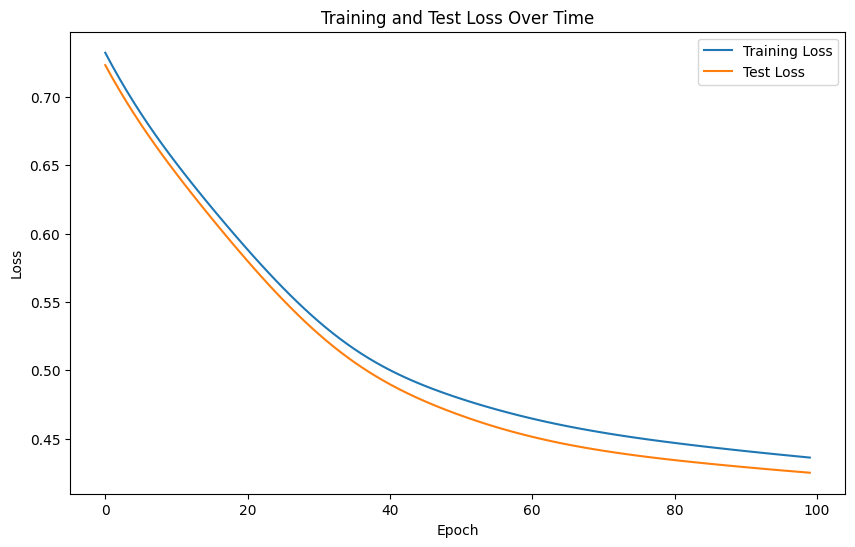

In [ ]:
# Visualize training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()
plt.show()

## Task 5: Model Evaluation


In [ ]:
# Make predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()
    y_pred_binary = (y_pred >= 0.5).float()

# Calculate accuracy
accuracy = (y_pred_binary == y_test_tensor.float()).float().mean()
print(f'Test Accuracy: {accuracy.item():.4f}')

Test Accuracy: 0.8070


In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_tensor, y_pred_binary)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_tensor, y_pred_binary))


Confusion Matrix:
[[940  96]
 [176 197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

